# Lab 4
## Yash Bhargava
## B20AI050

##Imports


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##1. Monthly changes in different food grain stocks.

##2. State wise Colleges of different Ayush Category.

###Loading Dataset

In [66]:
df2 = pd.read_csv('/content/drive/MyDrive/ClassWork/Semester6/DV/Lab4/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df2

,State or Union Territory,Type of System,No. of Colleges - Govt,Admission Capacity - Govt,Permitted Seats - Govt,No. of Colleges - Non-Govt,Admission Capacity - Non-Govt,Permitted Seats - Non-Govt
0,Andhra Pradesh,Ayurveda,1,100,100,2,176,118
1,Assam,Ayurveda,1,93,93,0,0,0
2,Bihar,Ayurveda,2,211,211,6,280,153
3,Chhattisgarh,Ayurveda,2,216,216,4,280,250
4,Delhi,Ayurveda,3,359,359,0,0,0
...,...,...,...,...,...,...,...,...
76,Telangana,Homoeopathy,1,163,163,4,350,350
77,Uttar Pradesh,Homoeopathy,9,1027,1027,4,374,242
78,Uttarakhand,Homoeopathy,0,0,0,2,110,50
79,West Bengal,Homoeopathy,5,459,459,7,395,380


In [67]:
df2 = df2.groupby(['State or Union Territory', 'Type of System'])[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].sum().reset_index()
df2['Total Colleges'] = df2['No. of Colleges - Govt'] + df2['No. of Colleges - Non-Govt']
df2.drop(['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'], axis=1, inplace=True)
df2

,State or Union Territory,Type of System,Total Colleges
0,Andhra Pradesh,Ayurveda,3
1,Andhra Pradesh,Homoeopathy,7
2,Andhra Pradesh,Naturopathy,2
3,Andhra Pradesh,Unani,1
4,Assam,Ayurveda,1
...,...,...,...
76,Uttarakhand,Naturopathy,1
77,Uttarakhand,Unani,1
78,West Bengal,Ayurveda,4
79,West Bengal,Homoeopathy,12


In [68]:
df2_pivot = df2.pivot(index='State or Union Territory', columns='Type of System', values='Total Colleges')
df2_pivot = df2_pivot.sort_index()
df2_pivot.columns = [col + ' total' for col in df2_pivot.columns]
df2_pivot = df2_pivot.reset_index()
df2_pivot = df2_pivot.fillna(0)
df2_pivot.head()

,State or Union Territory,Ayurveda total,Homoeopathy total,Naturopathy total,Siddha total,Unani total
0,Andhra Pradesh,3.0,7.0,2.0,0.0,1.0
1,Assam,1.0,3.0,0.0,0.0,0.0
2,Bihar,8.0,15.0,0.0,0.0,5.0
3,Chandigarh,0.0,1.0,0.0,0.0,0.0
4,Chhattisgarh,6.0,3.0,1.0,0.0,1.0


In [69]:
df2_pivot['State or Union Territory'] = df2_pivot['State or Union Territory'].str.strip()
df2_pivot = df2_pivot.groupby('State or Union Territory').sum().reset_index()  
df2_pivot.head()                                                                                                                                                                             

,State or Union Territory,Ayurveda total,Homoeopathy total,Naturopathy total,Siddha total,Unani total
0,Andhra Pradesh,3.0,7.0,2.0,0.0,1.0
1,Arunachal Pradesh,0.0,1.0,0.0,0.0,0.0
2,Assam,1.0,3.0,0.0,0.0,0.0
3,Bihar,8.0,15.0,0.0,0.0,5.0
4,Chandigarh,1.0,1.0,0.0,0.0,0.0


In [70]:
df2_pivot.set_index('State or Union Territory', inplace=True)

### Plots

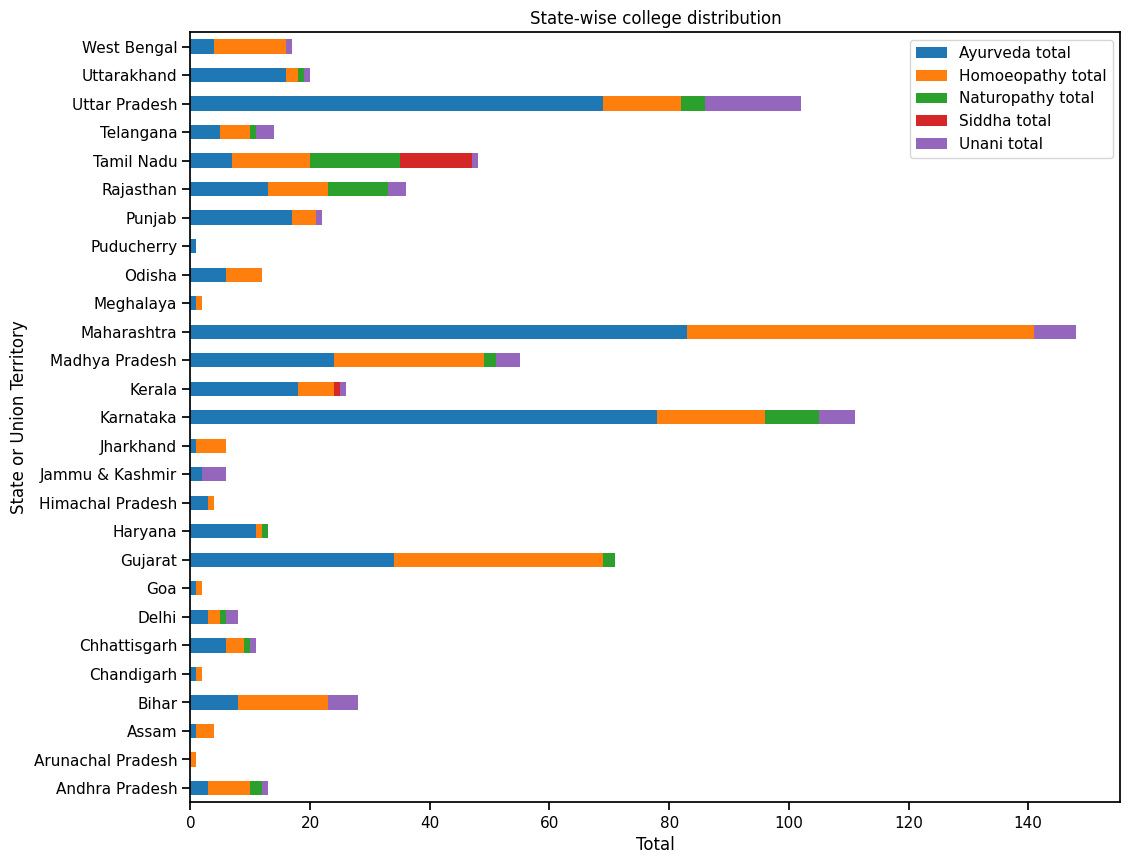

In [75]:
sns.set_context('notebook')
fig = df2_pivot.plot(kind='barh', stacked=True, figsize=(12,10))
fig.set_xlabel('Total')
fig.set_title('State-wise college distribution')

plt.show()

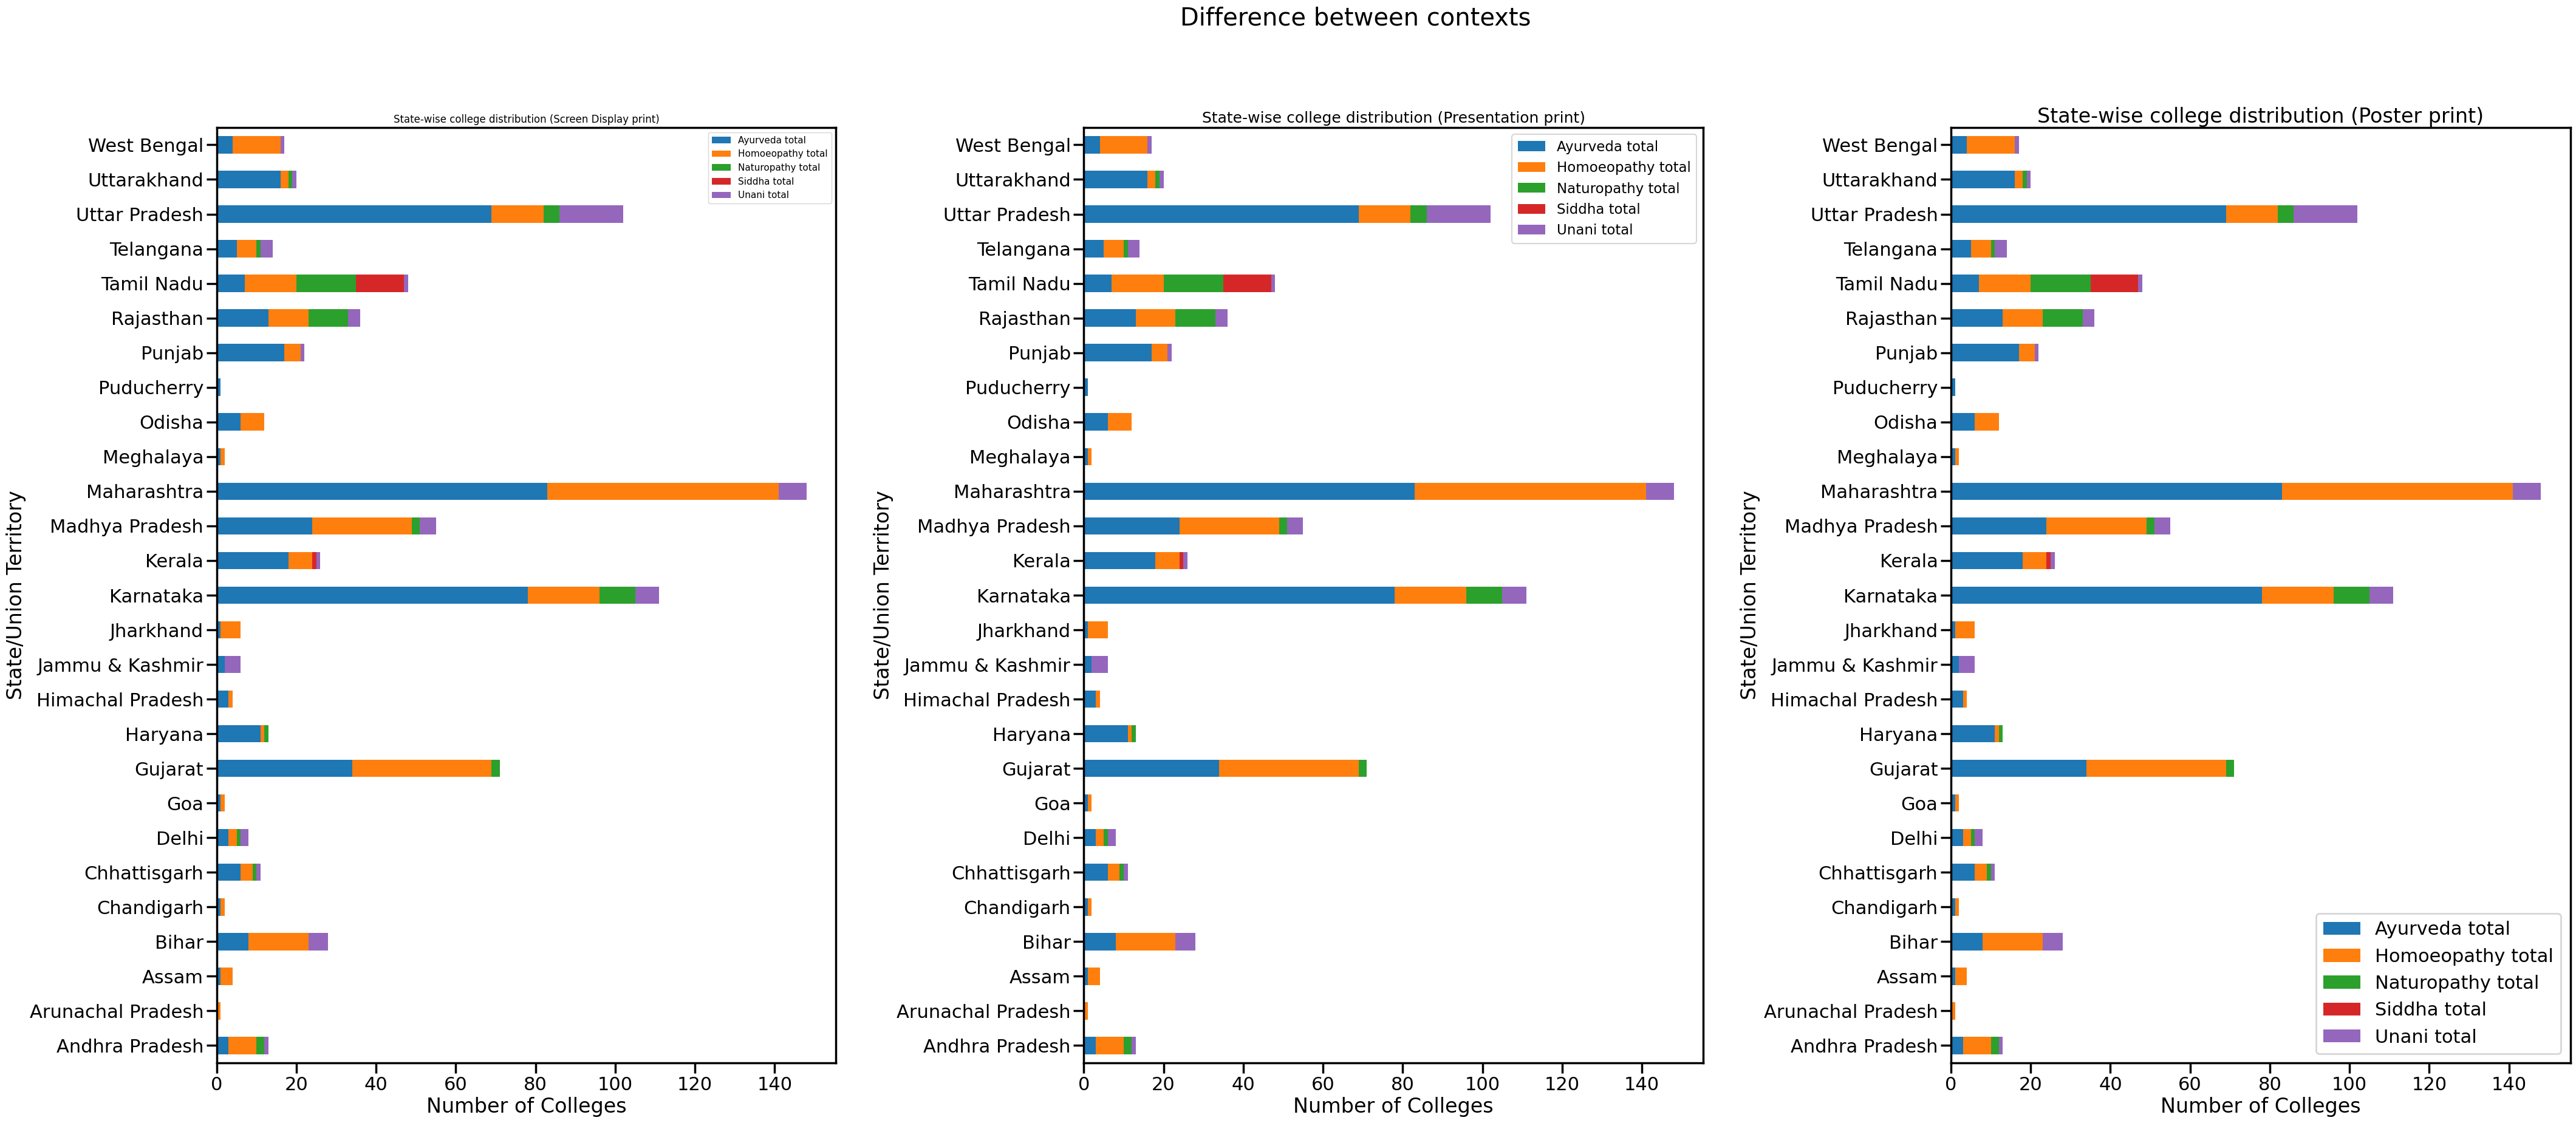

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(50, 20))

# Screen Display
fig1 = axes[0]
sns.set_context('notebook')
df2_pivot.plot(kind='barh', stacked=True, ax=fig1)
fig1.set_xlabel('Number of Colleges')
fig1.set_ylabel('State/Union Territory')
fig1.set_title('State-wise college distribution (Screen Display print)')

# Presentation
fig2 = axes[1]
sns.set_context('talk')
df2_pivot.plot(kind='barh', stacked=True, ax=fig2)
fig2.set_xlabel('Number of Colleges')
fig2.set_ylabel('State/Union Territory')
fig2.set_title('State-wise college distribution (Presentation print)')

# Poster
fig3 = axes[2]
sns.set_context('poster')
df2_pivot.plot(kind='barh', stacked=True, ax=fig3)
fig3.set_xlabel('Number of Colleges')
fig3.set_ylabel('State/Union Territory')
fig3.set_title('State-wise college distribution (Poster print)')

plt.subplots_adjust(wspace=0.4)
fig.suptitle("Difference between contexts")
plt.show()

###Color palettes

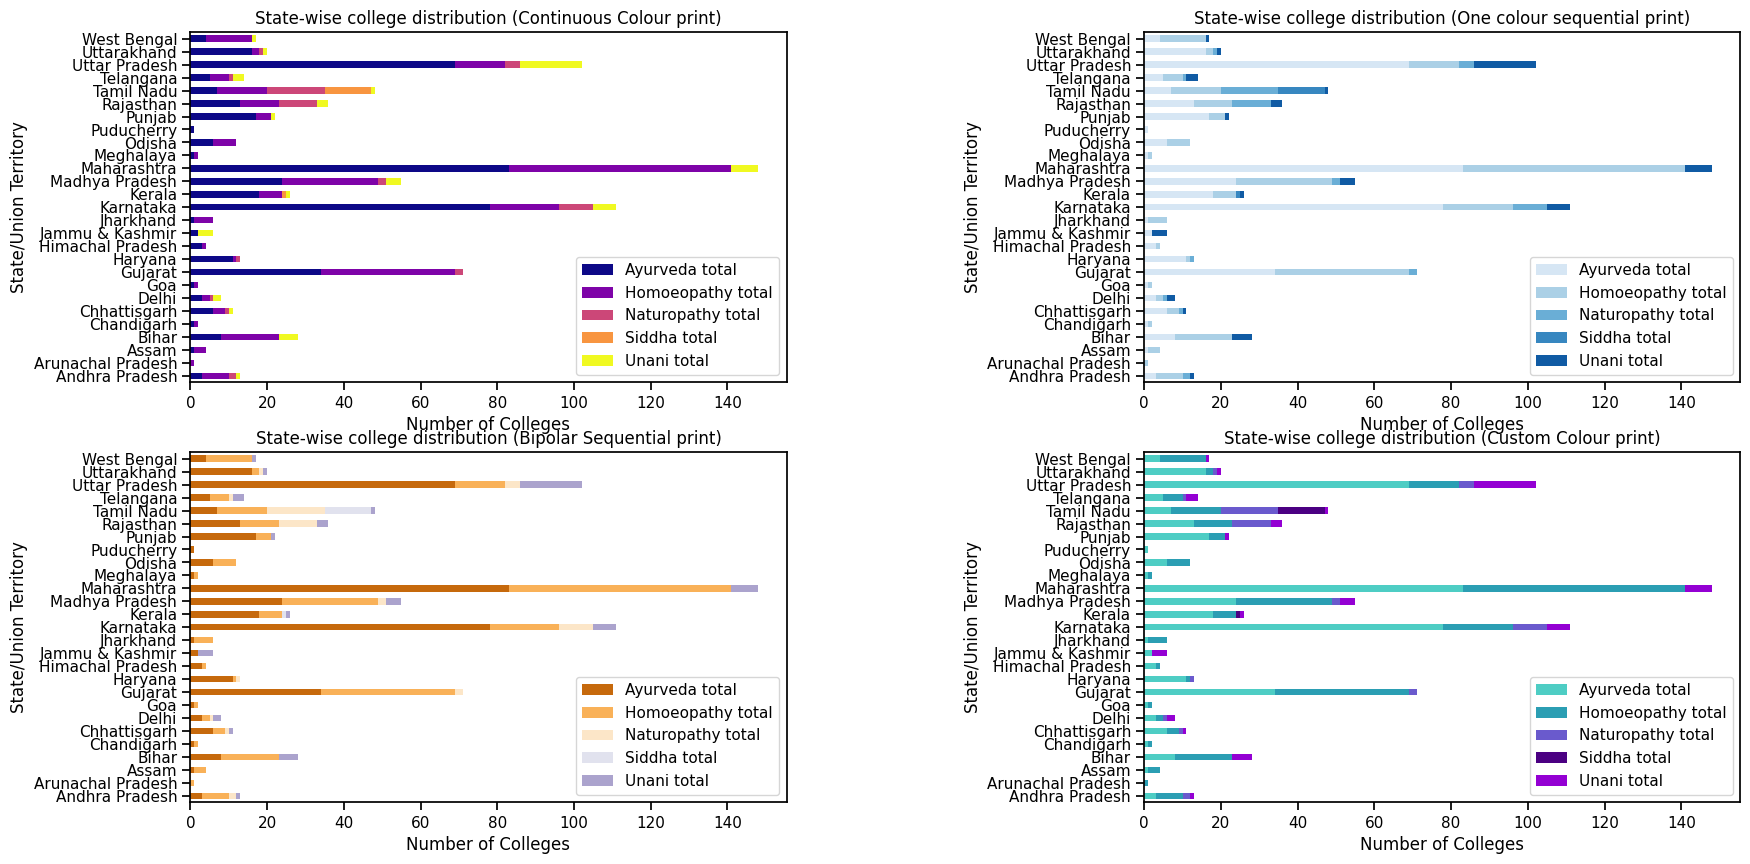

In [93]:
sns.set_context('notebook')

fig, axes = plt.subplots(2, 2, figsize=(40, 70))

# Continuous colour
fig1 = axes[0][0]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), cmap='plasma', ax=fig1)
fig1.set_xlabel('Number of Colleges')
fig1.set_ylabel('State/Union Territory')
fig1.set_title('State-wise college distribution (Continuous Colour print)')

# One colour sequential
fig2 = axes[0][1]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('Blues', n_colors=len(df2_pivot.columns)), ax=fig2)
fig2.set_xlabel('Number of Colleges')
fig2.set_ylabel('State/Union Territory')
fig2.set_title('State-wise college distribution (One colour sequential print)')

# Bipolar Sequential
fig3 = axes[1][0]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=sns.color_palette('PuOr'), ax=fig3)
fig3.set_xlabel('Number of Colleges')
fig3.set_ylabel('State/Union Territory')
fig3.set_title('State-wise college distribution (Bipolar Sequential print)')

# Custom Colour
fig4 = axes[1][1]
df2_pivot.plot(kind='barh', stacked=True, figsize=(20, 10), color=['#4ecdc4', '#2b9eb3', '#6a5acd', '#4b0082', '#9400d3'], ax=fig4)
fig4.set_xlabel('Number of Colleges')
fig4.set_ylabel('State/Union Territory')
fig4.set_title('State-wise college distribution (Custom Colour print)')

plt.subplots_adjust(wspace=0.6)

plt.show()

###Scale

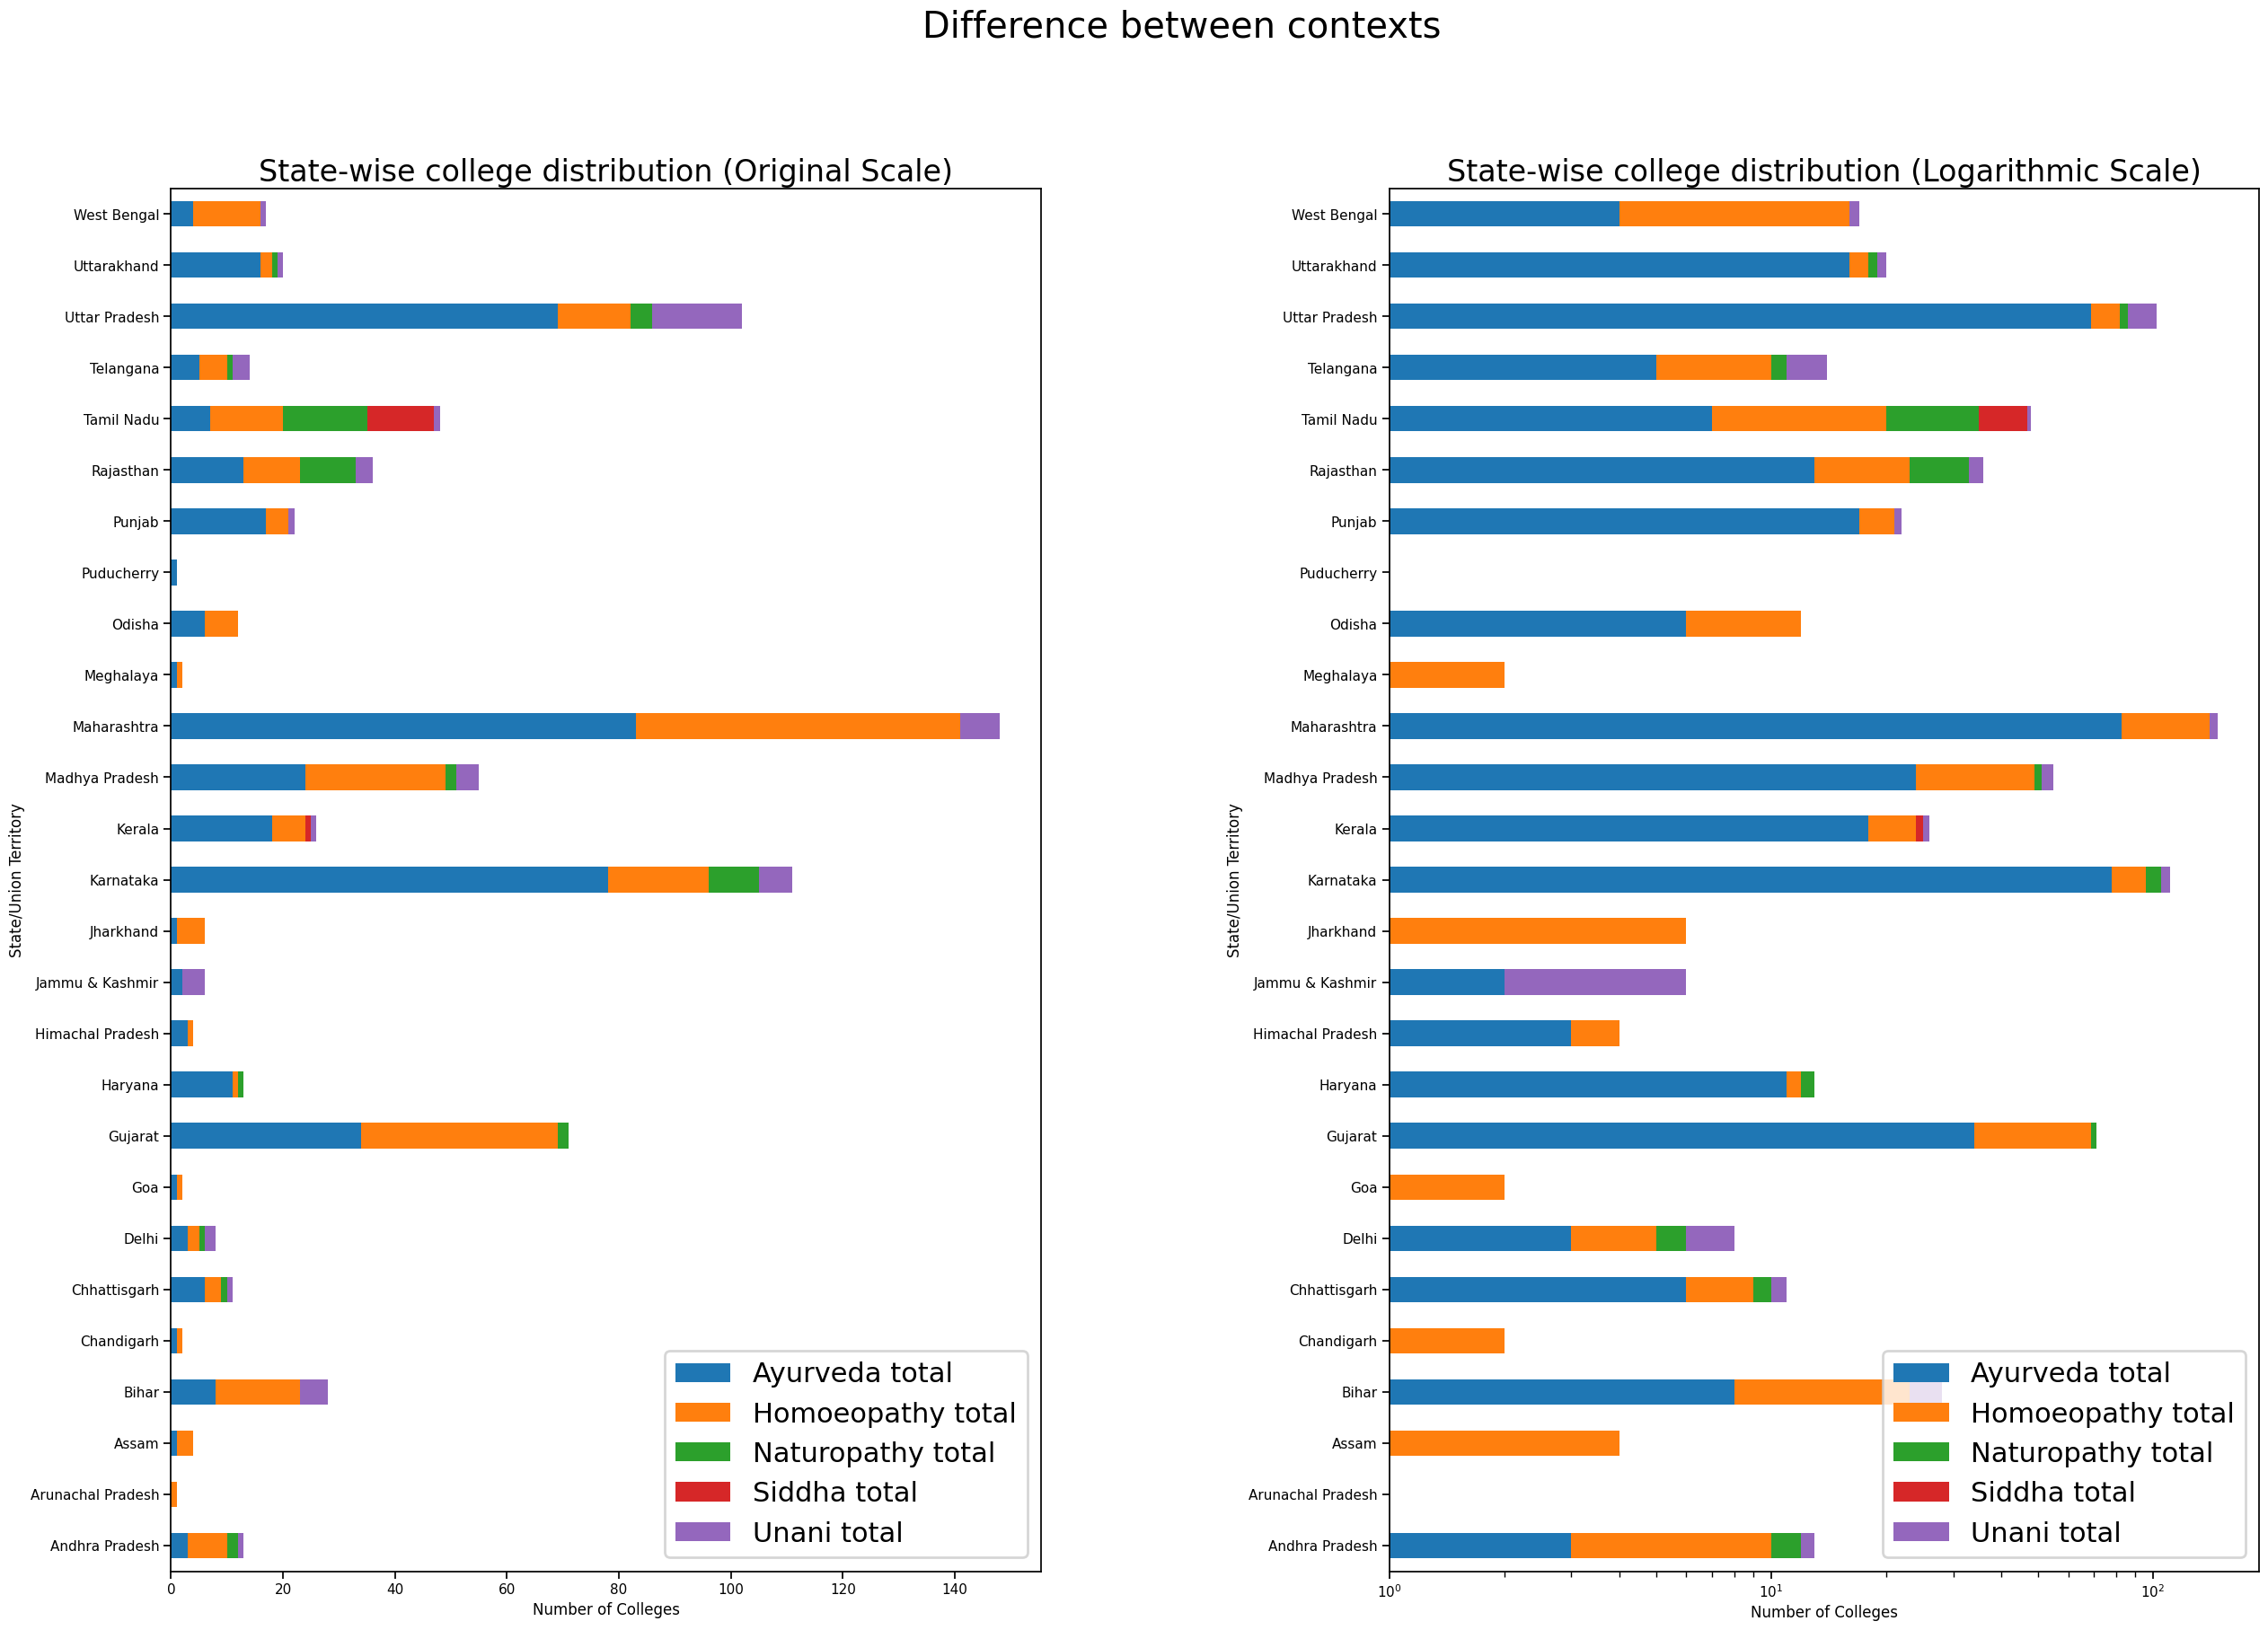

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(30, 20))
sns.set_context('poster')

# Original Scale
fig1 = axes[0]
df2_pivot.plot(kind='barh', stacked=True, ax=fig1)
fig1.set_xlabel('Number of Colleges')
fig1.set_ylabel('State/Union Territory')
fig1.set_title('State-wise college distribution (Original Scale)')

# Logarithmic Scale
fig2 = axes[1]
df2_pivot.plot(kind='barh', stacked=True, ax=fig2)
fig2.set_xlabel('Number of Colleges')
fig2.set_ylabel('State/Union Territory')
fig2.set_title('State-wise college distribution (Logarithmic Scale)')
fig2.set(xscale='log')

plt.subplots_adjust(wspace=0.4)
fig.suptitle("Difference between contexts")
plt.show()